# SEI(HC)R model

Based on [COVID-19-Scenarios](https://neherlab.org/covid19/about)

## Model

We propose the following model:

$$  \frac{dS(t)}{dt} = -\beta(t)  \frac{S(t)}{N}  I(t)        $$

$$  \frac{dE(t)}{dt} =  \beta(t) \frac{ S(t)}{N}  I(t) - {\gamma_L}E(t) $$

$$  \frac{d I(t)}{dt} =  \gamma_{L}E(t) - \gamma_{I \rightarrow R} f_{I \rightarrow R} I(t) - \gamma_{I \rightarrow H} ( 1- f_{I \rightarrow R} )I(t)   $$

$$  \frac{d H(t)}{dt} = \gamma_{I \rightarrow H} ( 1- f_{I \rightarrow R} )I(t) + \gamma_C ( 1 - f_{C \rightarrow D} ) C(t) - \gamma_H H(t) $$

$$  \frac{d C(t)}{dt} = {\gamma_H} f_{H \rightarrow C}  H(t) - \gamma_C C(t) $$

$$  \frac{d R(t)}{dt} = \gamma_{I \rightarrow R} f_{I \rightarrow R} I(t) + \gamma_H (1 - f_{H\rightarrow C}) H(t) $$

$$  \frac{d D (t)}{dt} = \gamma_C f_{C \rightarrow D}  C(t)   $$

### Parameters:

- $\beta(t)$: infection rate.
- $\tau_L \equiv \gamma_{L}^{-1}$: average incubation time scale (probably small for COVID-19, since asymptomatic infected individuals can spread the disease).


- $ \tau_{I \rightarrow R} \equiv \gamma_{I \rightarrow R}^{-1}$: average time an infected individual recovers without hospitalization.

- $ \tau_{I \rightarrow H} \equiv \gamma_{I \rightarrow H}^{-1}$: average time an infected individual with mild symptoms goes to a critical condition (needs hospitalization)



- $ f_{I \rightarrow R}$: fraction of infectious that are asymptomatic or mild (no hospitalization).


- $ \tau_C \equiv \gamma_{C}^{-1}$: average time an infected individual in critical case (ICU) dies $(C \rightarrow D)$ or gets better to leave the ICU $(C \rightarrow H)$.

- $\tau_H \equiv \gamma_{H}^{-1}$: average time a hospitalized person recovers or deteriorates to a critical state.
- $ f_{H\rightarrow C} $: fraction of hospitalized cases that turn to critical.
- $ f_{C \rightarrow D} $: fraction of critial cases that are fatal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import requests
import gzip

In [2]:
def beta_(t):
    x = 2.7
    return x


def model(y, t, N, params):
    
    S, E, I, H, C, R, D = y

    gamma_L, gamma_IR, gamma_IH, f_IR, gamma_C, gamma_H, f_HC, f_CD = params
    beta = beta_(t)
       
    dSdt = - beta*S* I /N
    
    dEdt = beta*S* I /N - gamma_L* E
    
    dIdt = gamma_L* E - gamma_IR*f_IR* I - gamma_IH*(1. - f_IR)* I
    
    dHdt = gamma_IH*(1. - f_IR)* I + gamma_C*(1. - f_CD)* C - gamma_H* H
    
    dCdt = gamma_H*f_HC* H - gamma_C* C
    
    dRdt = gamma_IR*f_IR* I + gamma_H*(1. - f_HC) *H
    
    dDdt = f_CD*gamma_C* C
    
    return dSdt, dEdt, dIdt, dHdt, dCdt, dRdt, dDdt

#### Testing the model with some arbitrary parameters

In [3]:
# Total population
N = 10000

# Average incubation time scale 
gamma_L = 1./5
# average time an infected individual recovers without hospitalization
gamma_IR = 1./14
# average time an infected individual with mild symptoms goes to a critical condition (needs hospitalization)
gamma_IH = 1./5
# fraction of infectious that are asymptomatic or mild (no hospitalization).
f_IR = 0.7
# average time an infected individual in critical case (ICU) dies or gets better to leave the ICU$.
gamma_C = 1./7
# average time a hospitalized person recovers or deteriorates to a critical state.
gamma_H = 1.7
# fraction of hospitalized cases that turn to critical
f_HC = 0.2
# fraction of critial cases that are fatal
f_CD = 0.6

E0, I0, H0, C0, R0, D0 = 0, 1, 0, 0, 0, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - E0 - I0 - H0 - C0 - R0 - D0

# Grid of time poins, in days
t = np.linspace(0, 120, 120)

# Initial conditions vector
y0 = S0, E0, I0, H0, C0, R0, D0

# Parameters
params = gamma_L, gamma_IR, gamma_IH, f_IR, gamma_C, gamma_H, f_HC, f_CD

In [4]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(model, y0, t, args=(N, params))
S, E, I, H, C, R, D = ret.T

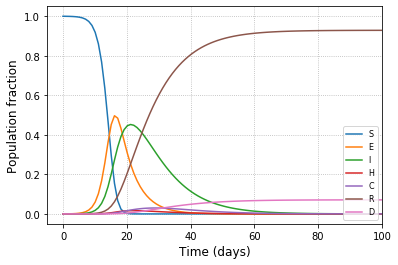

In [5]:
plt.plot(t, S/N, color= 'C0', label='S')
plt.plot(t, E/N, color= 'C1', label='E')
plt.plot(t, I/N, color= 'C2', label='I')
plt.plot(t, H/N, color= 'C3', label='H')
plt.plot(t, C/N, color= 'C4', label='C')
plt.plot(t, R/N, color= 'C5', label='R')
plt.plot(t, D/N, color= 'C6', label='D')
plt.xlabel('Time (days)', fontsize= 12)
plt.ylabel('Population fraction', fontsize= 12)
plt.xlim([-5, 100])
plt.grid(linestyle=':')
plt.legend(loc= 'lower right', fontsize= 8)
plt.show()

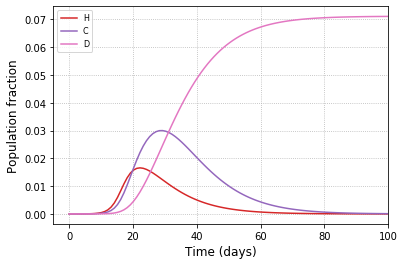

In [6]:
#plt.plot(t, S/N, color= 'C0', label='S')
#plt.plot(t, E/N, color= 'C1', label='E')
#plt.plot(t, I/N, color= 'C2', label='I')
plt.plot(t, H/N, color= 'C3', label='H')
plt.plot(t, C/N, color= 'C4', label='C')
#plt.plot(t, R/N, color= 'C5', label='R')
plt.plot(t, D/N, color= 'C6', label='D')
plt.xlabel('Time (days)', fontsize= 12)
plt.ylabel('Population fraction', fontsize= 12)
plt.xlim([-5, 100])
plt.grid(linestyle=':')
plt.legend(loc= 'upper left', fontsize= 8)
plt.show()

## Data from Brazil

Data from [Brasil.IO](https://brasil.io/dataset/covid19/caso). 

In [7]:
url = "https://data.brasil.io/dataset/covid19/caso.csv.gz"
filename = 'data/ ' + url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

In [8]:
with gzip.open(filename) as f:

    df = pd.read_csv(f)

df.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-12,CE,NaN,state,1747,76.0,28,True,9132078.0,23.0,19.13037,0.0435
1,2020-04-11,CE,NaN,state,1668,74.0,27,False,9132078.0,23.0,18.26528,0.0444
2,2020-04-10,CE,NaN,state,1558,67.0,26,False,9132078.0,23.0,17.06074,0.0430
3,2020-04-09,CE,NaN,state,1445,57.0,25,False,9132078.0,23.0,15.82334,0.0394
4,2020-04-08,CE,NaN,state,1394,57.0,24,False,9132078.0,23.0,15.26487,0.0409


In [9]:
df_SP = df[ df['state'] == 'SP' ]
df_SP.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
7429,2020-04-12,SP,NaN,state,8755,588.0,46,True,45919049.0,35.0,19.06616,0.0672
7430,2020-04-11,SP,NaN,state,8419,560.0,45,False,45919049.0,35.0,18.33444,0.0665
7431,2020-04-10,SP,NaN,state,8216,540.0,44,False,45919049.0,35.0,17.89236,0.0657
7432,2020-04-09,SP,NaN,state,7480,496.0,43,False,45919049.0,35.0,16.28954,0.0663
7433,2020-04-08,SP,NaN,state,6708,428.0,42,False,45919049.0,35.0,14.60832,0.0638


In [10]:
df_SP['city'].value_counts(dropna= False)

NaN                       46
São Paulo                 38
Santana de Parnaíba       29
Ferraz de Vasconcelos     24
Importados/Indefinidos    24
                          ..
Estiva Gerbi               2
Caiabu                     2
Amparo                     2
Santa Lúcia                2
Jardinópolis               1
Name: city, Length: 166, dtype: int64

Let's keep is simple and just analyze the confirmed case's evolution in Brazil.

In [11]:
df_ = df[ df['place_type'] == 'state']
df_.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-12,CE,NaN,state,1747,76.0,28,True,9132078.0,23.0,19.13037,0.0435
1,2020-04-11,CE,NaN,state,1668,74.0,27,False,9132078.0,23.0,18.26528,0.0444
2,2020-04-10,CE,NaN,state,1558,67.0,26,False,9132078.0,23.0,17.06074,0.0430
3,2020-04-09,CE,NaN,state,1445,57.0,25,False,9132078.0,23.0,15.82334,0.0394
4,2020-04-08,CE,NaN,state,1394,57.0,24,False,9132078.0,23.0,15.26487,0.0409


In [12]:
df_.groupby('date')[['confirmed', 'deaths']].sum()

,confirmed,deaths
date,,
2020-02-25,1,0.0
2020-02-26,1,0.0
2020-02-27,1,0.0
2020-02-28,2,0.0
2020-02-29,2,0.0
2020-03-01,2,0.0
2020-03-02,2,0.0
2020-03-03,2,0.0
2020-03-04,3,0.0


In [13]:
df_grouped = df_.groupby('date')[['confirmed', 'deaths']].sum()

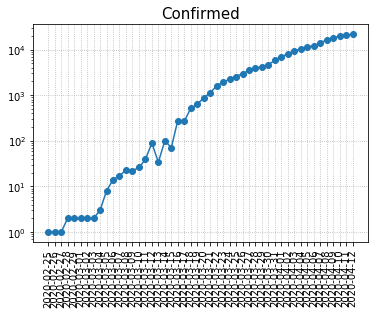

In [14]:
plt.plot(df_grouped['confirmed'], 'o-', color= 'C0')
plt.title('Confirmed', fontsize= 15)
plt.xticks(rotation=90)
plt.grid(linestyle=':')
plt.yscale('log')
plt.show()

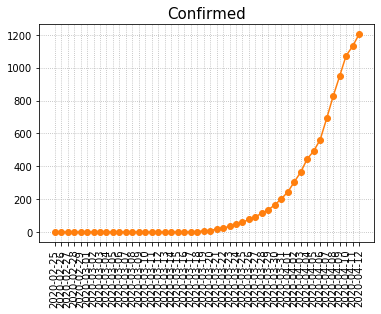

In [15]:
plt.plot(df_grouped['deaths'], 'o-', color= 'C1')
plt.title('Confirmed', fontsize= 15)
plt.xticks(rotation=90)
plt.grid(linestyle=':')
#plt.yscale('log')
plt.show()

## Estado de São Paulo

In [16]:
df__ = df_[df_['state'] == 'SP'][['date', 'confirmed', 'deaths', 'confirmed_per_100k_inhabitants']]
df__SP = df__.set_index('date').sort_index()
df__SP

,confirmed,deaths,confirmed_per_100k_inhabitants
date,,,
2020-02-25,1,0.0,0.00218
2020-02-26,1,0.0,0.00218
2020-02-27,1,0.0,0.00218
2020-02-28,2,0.0,0.00436
2020-02-29,2,0.0,0.00436
2020-03-01,2,0.0,0.00436
2020-03-02,2,0.0,0.00436
2020-03-03,2,0.0,0.00436
2020-03-04,3,0.0,0.00653


In [17]:
df__SP.shape

(46, 3)

In [18]:
# Total population
N = 45919049 

def beta_(t):
    beta_0 = 2.7
    beta_min = 1.0
    mit_weight = 1.0
    mit_exp = 1.5
    
    x = beta_0*( mit_weight/(t + 0.0001)**(mit_exp) +  beta_min/beta_0 )
    return x

# Average incubation time scale 
gamma_L = 1./5
# average time an infected individual recovers without hospitalization
gamma_IR = 1./14
# average time an infected individual with mild symptoms goes to a critical condition (needs hospitalization)
gamma_IH = 1./3
# fraction of infectious that are asymptomatic or mild (no hospitalization).
f_IR = 0.8
# average time an infected individual in critical case (ICU) dies or gets better to leave the ICU$.
gamma_C = 1./7
# average time a hospitalized person recovers or deteriorates to a critical state.
gamma_H = 1/.5
# fraction of hospitalized cases that turn to critical
f_HC = 0.5
# fraction of critial cases that are fatal
f_CD = 0.4

E0, I0, H0, C0, R0, D0 = 0, 1, 0, 0, 0, 0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - E0 - I0 - H0 - C0 - R0 - D0

# Grid of time poins, in days
t = np.linspace(0, 100, 100)

# Initial conditions vector
y0 = S0, E0, I0, H0, C0, R0, D0

# Parameters
params = gamma_L, gamma_IR, gamma_IH, f_IR, gamma_C, gamma_H, f_HC, f_CD

In [19]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(model, y0, t, args=(N, params))
S, E, I, H, C, R, D = ret.T

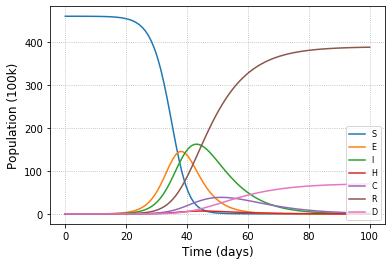

In [20]:
scale = 100*1000

plt.plot(t, S/scale, color= 'C0', label='S')
plt.plot(t, E/scale, color= 'C1', label='E')
plt.plot(t, I/scale, color= 'C2', label='I')
plt.plot(t, H/scale, color= 'C3', label='H')
plt.plot(t, C/scale, color= 'C4', label='C')
plt.plot(t, R/scale, color= 'C5', label='R')
plt.plot(t, D/scale, color= 'C6', label='D')
plt.xlabel('Time (days)', fontsize= 12)
plt.ylabel('Population (100k)', fontsize= 12)
#plt.xlim([-5, 100])
plt.grid(linestyle=':')
plt.legend(loc= 'lower right', fontsize= 8)
#plt.yscale('log')
plt.show()

In [21]:
t_SP = np.linspace(0, df__SP['confirmed_per_100k_inhabitants'].shape[0] - 1, 
                   df__SP['confirmed_per_100k_inhabitants'].shape[0] )
t_SP

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45.])

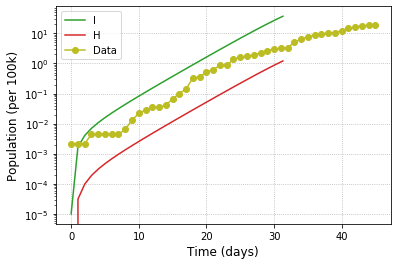

In [22]:
#plt.plot(t, S, color= 'C0', label='S')
#plt.plot(t, E, color= 'C1', label='E')
plt.plot(t[:32], I[:32]/scale, color= 'C2', label='I')
plt.plot(t[:32], H[:32]/scale, color= 'C3', label='H')
#plt.plot(t[:35], C[:35]/scale, color= 'C4', label='C')
plt.plot(t_SP, df__SP['confirmed_per_100k_inhabitants'], color= 'C8', label= 'Data', marker= 'o')
#plt.plot(t, R, color= 'C5', label='R')
#plt.plot(t, D, color= 'C6', label='D')
plt.xlabel('Time (days)', fontsize= 12)
plt.ylabel('Population (per 100k)', fontsize= 12)
#plt.xlim([-5, 100])
plt.grid(linestyle=':')
plt.legend(loc= 'upper left', fontsize= 10)
plt.yscale('log')
plt.show()

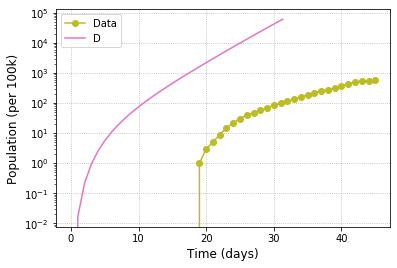

In [23]:
#plt.plot(t, S, color= 'C0', label='S')
#plt.plot(t, E, color= 'C1', label='E')
#plt.plot(t[:32], I[:32]/scale, color= 'C2', label='I')
#plt.plot(t[:32], H[:32]/scale, color= 'C3', label='H')
#plt.plot(t[:35], C[:35]/scale, color= 'C4', label='C')
plt.plot(t_SP, df__SP['deaths'], color= 'C8', label= 'Data', marker= 'o')
#plt.plot(t, R, color= 'C5', label='R')
plt.plot(t[:32], D[:32], color= 'C6', label='D')
plt.xlabel('Time (days)', fontsize= 12)
plt.ylabel('Population (per 100k)', fontsize= 12)
#plt.xlim([-5, 100])
plt.grid(linestyle=':')
plt.legend(loc= 'upper left', fontsize= 10)
plt.yscale('log')
plt.show()

## Comparing the states

In [24]:
df_

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-12,CE,NaN,state,1747,76.0,28,True,9132078.0,23.0,19.13037,0.0435
1,2020-04-11,CE,NaN,state,1668,74.0,27,False,9132078.0,23.0,18.26528,0.0444
2,2020-04-10,CE,NaN,state,1558,67.0,26,False,9132078.0,23.0,17.06074,0.0430
3,2020-04-09,CE,NaN,state,1445,57.0,25,False,9132078.0,23.0,15.82334,0.0394
4,2020-04-08,CE,NaN,state,1394,57.0,24,False,9132078.0,23.0,15.26487,0.0409
...,...,...,...,...,...,...,...,...,...,...,...,...
12337,2020-03-18,MS,NaN,state,7,0.0,5,False,2778986.0,50.0,0.25189,NaN
12338,2020-03-17,MS,NaN,state,6,0.0,4,False,2778986.0,50.0,0.21591,NaN
12339,2020-03-16,MS,NaN,state,4,0.0,3,False,2778986.0,50.0,0.14394,NaN
12340,2020-03-15,MS,NaN,state,2,0.0,2,False,2778986.0,50.0,0.07197,NaN


In [25]:
df__ = df_[df_['state'] == 'SC'][['date', 'confirmed', 'deaths', 'confirmed_per_100k_inhabitants']]
df__SC = df__.set_index('date').sort_index()
df__SC

,confirmed,deaths,confirmed_per_100k_inhabitants
date,,,
2020-03-12,2,0.0,0.02791
2020-03-13,3,0.0,0.04187
2020-03-14,5,0.0,0.06979
2020-03-15,6,0.0,0.08374
2020-03-16,7,0.0,0.09770
2020-03-17,7,0.0,0.09770
2020-03-18,14,0.0,0.19540
2020-03-19,21,0.0,0.29310
2020-03-20,40,0.0,0.55829


In [26]:
t_SC = np.linspace(0, df__SC['confirmed_per_100k_inhabitants'].shape[0] - 1, 
                   df__SC['confirmed_per_100k_inhabitants'].shape[0] )
t_SC

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31.])

In [27]:
df_BR = df_.groupby('date')[['confirmed', 'deaths']].sum()
df_BR

,confirmed,deaths
date,,
2020-02-25,1,0.0
2020-02-26,1,0.0
2020-02-27,1,0.0
2020-02-28,2,0.0
2020-02-29,2,0.0
2020-03-01,2,0.0
2020-03-02,2,0.0
2020-03-03,2,0.0
2020-03-04,3,0.0


In [28]:
df_BR['confirmed_per_100k_inhabitants'] = df_BR['confirmed'] / 100000

In [29]:
df_BR

,confirmed,deaths,confirmed_per_100k_inhabitants
date,,,
2020-02-25,1,0.0,0.00001
2020-02-26,1,0.0,0.00001
2020-02-27,1,0.0,0.00001
2020-02-28,2,0.0,0.00002
2020-02-29,2,0.0,0.00002
2020-03-01,2,0.0,0.00002
2020-03-02,2,0.0,0.00002
2020-03-03,2,0.0,0.00002
2020-03-04,3,0.0,0.00003


In [30]:
t_BR = np.linspace(0, df_BR['confirmed_per_100k_inhabitants'].shape[0] - 1, 
                   df_BR['confirmed_per_100k_inhabitants'].shape[0] )
t_BR

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47.])

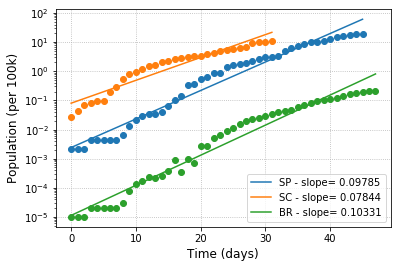

In [32]:
plt.plot(t_SP, df__SP['confirmed_per_100k_inhabitants'], marker= 'o', linestyle = 'None', color= 'C0')
plt.plot(t_SC, df__SC['confirmed_per_100k_inhabitants'], marker= 'o', linestyle = 'None', color= 'C1')
plt.plot(t_BR, df_BR['confirmed_per_100k_inhabitants'], marker= 'o', linestyle = 'None', color= 'C2')

m_SP, b_SP = np.polyfit(t_SP, np.log10(df__SP['confirmed_per_100k_inhabitants']), 1)
m_SC, b_SC = np.polyfit(t_SC, np.log10(df__SC['confirmed_per_100k_inhabitants']), 1)
m_BR, b_BR = np.polyfit(t_BR, np.log10(df_BR['confirmed_per_100k_inhabitants']), 1)

#x_fit = np.linspace(0, 33, 100)

plt.plot(t_SP, 10**(m_SP*t_SP + b_SP), color= 'C0', label= 'SP - slope= %.5f' % m_SP)
plt.plot(t_SC, 10**(m_SC*t_SC + b_SC), color= 'C1', label= 'SC - slope= %.5f' % m_SC)
plt.plot(t_BR, 10**(m_BR*t_BR + b_BR), color= 'C2', label= 'BR - slope= %.5f' % m_BR)

plt.xlabel('Time (days)', fontsize= 12)
plt.ylabel('Population (per 100k)', fontsize= 12)
plt.grid(linestyle=':')
plt.legend(loc= 'lower right', fontsize= 10)
plt.yscale('log')
plt.savefig('comparing_.png')
plt.show()